# 2025-07-22 화요일 파이썬 4일째
---

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1753153200,
            "main": {
                "temp": 303.91,
                "feels_like": 310.11,
                "temp_min": 303.91,
                "temp_max": 304.82,
                "pressure": 1015,
                "sea_level": 1015,
                "grnd_level": 1005,
                "humidity": 70,
                "temp_kf": -0.91
            },
            "weather": [
                {
                    "id": 803,
                    "main": "Clouds",
                    "description": "broken clouds",
                    "icon": "04d"
                }
            ],
            "clouds": {
                "all": 75
            },
            "wind": {
                "speed": 3.7,
                "deg": 249,
                "gust": 4.15
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
      

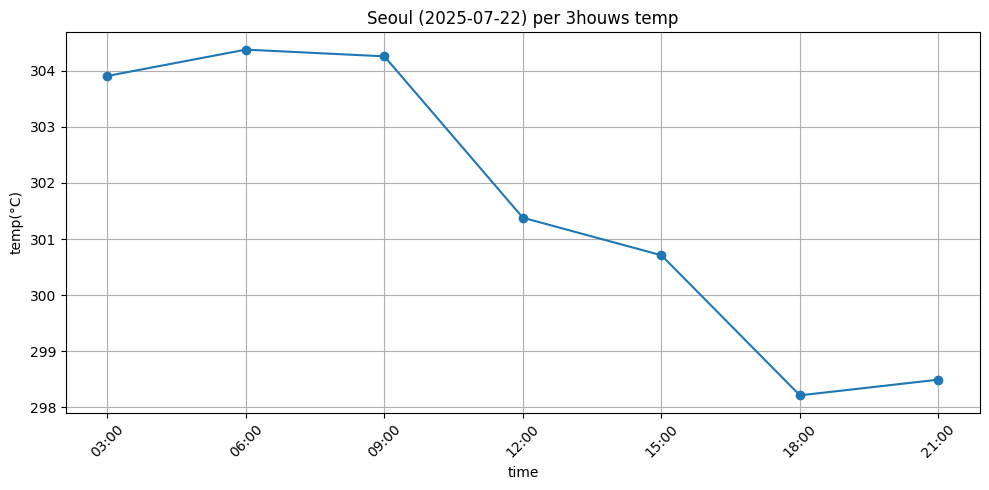

In [1]:
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

API_KEY = 'da6dae7bf19dd1d89fe7cad070e71b06'
CITY = 'Seoul'
UNITS = 'metric'
LANG = 'kr'

# 3시간 간격 5일 예보 API호출
# url = f'https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units={UNITS}&lang={LANG}'

geo = f'http://api.openweathermap.org/geo/1.0/direct?q={CITY}&appid={API_KEY}'
response_geo = requests.get(geo)
data_geo = json.loads(response_geo.text)
# print(data_geo[0]['lat'])
url2 = f"https://api.openweathermap.org/data/2.5/forecast?lat={data_geo[0]['lat']}&lon={data_geo[0]['lon']}&appid={API_KEY}"
response = requests.get(url2)

if response.status_code != 200:
    print("API 호출 오류 : ", response.status_code, response.text)
    exit()

# json.loads : json 문자열을 [객체로]
# json.dumps : 객체를 [json 문자열로]


# 오늘 날짜 가져오기
forecast_data = response.json()


print(json.dumps(forecast_data, indent = 4))

today = datetime.now().date()

times = []
temps = []

for item in forecast_data['list']:
    dt = datetime.strptime(item['dt_txt'], '%Y-%m-%d %H:%M:%S')
    if dt.date() == today:
        times.append(dt.strftime('%H:%M'))
        temps.append(item['main']['temp'])
if not times:
    print(f"{CITY}의 오늘 데이터가 없습니다.")
    exit()

plt.figure(figsize=(10, 5))  # 플롯 크기 설정
plt.plot(times, temps, marker='o')  # 선 그래프 생성
plt.title(f"{CITY} ({today}) per 3houws temp")  # 제목 설정
plt.xlabel('time')  # x축 레이블 설정
plt.ylabel('temp(°C)')  # y축 레이블 설정
plt.grid()  # 그리드 추가
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 플롯 표시



### 반복문(while)

In [2]:
count = 0
while count < 5:
    count += 1
    if count == 3:
        break
        # continue
    print(count)
print("끝!")

1
2
끝!


In [3]:
while True:
    user = input("exit")
    print(user)
    if user == 'exit':
        break
print("빠져나왔습니다")

exit
빠져나왔습니다


In [4]:
coffee = 3
money = 300

while money:
    print("돈을 받았으니 커피를 줍니다")
    coffee -= 1
    print(f"남은 커피의 양은 {coffee}개 입니다")
    if coffee == 0:
        print("커피가 떨어졌어요. 판매 중지합니다")
        break

돈을 받았으니 커피를 줍니다
남은 커피의 양은 2개 입니다
돈을 받았으니 커피를 줍니다
남은 커피의 양은 1개 입니다
돈을 받았으니 커피를 줍니다
남은 커피의 양은 0개 입니다
커피가 떨어졌어요. 판매 중지합니다


In [5]:
coffee = 3
perMoney = 300

while True:
    print(f"현재 커피 잔량 : {coffee}잔")
    money = int(input("돈을 넣어주세요 : "))
    if money == perMoney:
        coffee -= 1
        print("커피를 줍니다")
    elif money > perMoney:
        coffee -= 1
        change = money - perMoney
        print("커피를 줍니다")
        print(f"거스름돈 : {change}원")
    else:
        print("커피를 주지 않습니다")
        print("돈을 돌려 줍니다")
        print("금액이 부족합니다")
        continue

    if coffee == 0:
        print("커피가 다 떨어졌습니다. 판매를 중지합니다")
        break

현재 커피 잔량 : 3잔
커피를 줍니다
거스름돈 : 700원
현재 커피 잔량 : 2잔
커피를 줍니다
거스름돈 : 700원
현재 커피 잔량 : 1잔
커피를 줍니다
거스름돈 : 700원
커피가 다 떨어졌습니다. 판매를 중지합니다


### 자료 활용

In [6]:
# 리스트
a = [1,3,5,7,9]
b = [] # 초기화
c = list()
d = ['김','이','박','최','정','강']
e = [1, 2, '김','이', 3]
f = [[1,2,3],['김','이','박'],[4,'최',5,'정'], {'성씨' : '강', 'id' : 6},7,8]

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(f[2][1])
print(f[3]['성씨'])

[1, 3, 5, 7, 9]
[]
[]
['김', '이', '박', '최', '정', '강']
[1, 2, '김', '이', 3]
[[1, 2, 3], ['김', '이', '박'], [4, '최', 5, '정'], {'성씨': '강', 'id': 6}, 7, 8]
최
강


In [7]:
print(a[1] + a[3])
print(a[0:3])
print(f[2:5])
print(d[-1])

10
[1, 3, 5]
[[4, '최', 5, '정'], {'성씨': '강', 'id': 6}, 7]
강


In [8]:
print(a)
a[2] = 2
print(a)

[1, 3, 5, 7, 9]
[1, 3, 2, 7, 9]


In [9]:
# 주소를 복사
h = a
print(h)
h[2] = 5
print(h)

[1, 3, 2, 7, 9]
[1, 3, 5, 7, 9]


In [10]:
print(a)

[1, 3, 5, 7, 9]


In [11]:
# 값을 복사
i = a[:]
print(i)
print(a)
a[2] = 10
print(i)
print(a)
a[2] = 5

[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]
[1, 3, 10, 7, 9]


In [30]:
a = [1,3,5,7,9]
print(a)
del a[1] # 값을 인덱스(1)로 삭제
print(a)
del a[1:3] # 값을 슬라이스[1:3]로 삭제
print(a)
a.append(7) # 값(7) 추가
print(a)
a.extend([3,5]) # 여러 값[3,5]을 각각의 값으로 추가(확장)
print(a)
# a.append([3,5]) # 리스트 자체[3,5]를 추가
# print(a)

[1, 3, 5, 7, 9]
[1, 5, 7, 9]
[1, 9]
[1, 9, 7]
[1, 9, 7, 3, 5]


In [13]:
a = [1,9,7,3,5]
print(" 기 본  :",a)
a.reverse() # 역순으로 정렬
print(" 역 순  :",a)
a.sort() # 오름차순 정렬
print("오름차순 :",a)
a.sort(reverse = True) # 내림차순 정렬
print("내림차순 :",a)


 기 본  : [1, 9, 7, 3, 5]
 역 순  : [5, 3, 7, 9, 1]
오름차순 : [1, 3, 5, 7, 9]
내림차순 : [9, 7, 5, 3, 1]


In [ ]:
a = ['a','c','w','b','e']
print(" 기 본  :",a)
a.reverse() # 역순으로 정렬
print(" 역 순  :",a)
a.sort() # 오름차순 정렬
print("오름차순 :",a)
a.sort(reverse = True) # 내림차순 정렬
print("내림차순 :",a)

c = 'b'
try:
    idx = a.index(c)
except ValueError:
    idx = -1
print(f"'{c}'의 인덱스 : ",idx)

 기 본  : ['a', 'c', 'w', 'b', 'e']
 역 순  : ['e', 'b', 'w', 'c', 'a']
오름차순 : ['a', 'b', 'c', 'e', 'w']
내림차순 : ['w', 'e', 'c', 'b', 'a']
'b'의 인덱스 :  3


In [21]:
a = [1,2,3]
print(a)
a.insert(0,4) # index위치에 값 추가
print(a)
a.insert(len(a),5)
print(a)
# del a[0] # 인덱스로 삭제
# print(a)
# print(a.pop())
# print(a)
# print(a.pop(0))
# print(a)

[1, 2, 3]
[4, 1, 2, 3]
[4, 1, 2, 3, 5]


In [31]:
a = [4, 1, 2, 3, 5]
print(a)
a.remove(5) # 값으로 삭제
print(a)
a.remove(2)
print(a)
a.remove(4)
print(a)

[4, 1, 2, 3, 5]
[4, 1, 2, 3]
[4, 1, 3]
[1, 3]


In [ ]:
a = [1,2,3]
b = a.pop() # 마지막 인덱스의 값을 지우고 지운 값 반환
print("list :", a)
print("pop() :", b)


list : [1, 2]
pop() : 3


In [41]:
a = [1,2,3]
b = a.pop(0) # 입력된 인덱스의 값을 지우고 지운 값 반환
print("list :", a)
print("pop() :", b)

list : [2, 3]
pop() : 1


In [ ]:
a = [5, 3, 9]
print(min(a))
print(max(a))
print(sum(a))
print(sum(range(1,101)))

a.sort() # 원본이 수정
c = sorted(a, reverse = True) # 정렬된 결과만 받기
print(a)
print(c)

3
9
17
5050
[3, 5, 9]
[9, 5, 3]


In [74]:
a = [4, 1, 2, 3, 2]
while 2 in a:
    a.remove(2)
print(a)

[4, 1, 3]


In [78]:
a = [4, 1, 2, 3, 2]
a = list(set(a))
a.remove(2)
print(a)

[1, 3, 4]
